In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
#pip install xgboost

In [4]:
df = pd.read_csv("C:/Users/xusen/Desktop/Uchi Courses/Machine Learning/mushrooms.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
selected_features = [
    'class', 'cap-shape', 'cap-surface', 'bruises', 'gill-attachment', 
    'gill-spacing', 'stalk-shape', 
    'ring-number', 'ring-type', 'habitat'
]

df = df[selected_features]

df.head()

,class,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,stalk-shape,ring-number,ring-type,habitat
0,p,x,s,t,f,c,e,o,p,u
1,e,x,s,t,f,c,e,o,p,g
2,e,b,s,t,f,c,e,o,p,m
3,p,x,y,t,f,c,e,o,p,u
4,e,x,s,f,f,w,t,o,e,g


In [9]:
label_encoder = LabelEncoder()
scaler= StandardScaler()
encoded_df = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)
scaled_df

,class,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,stalk-shape,ring-number,ring-type,habitat
0,1.036613,1.029712,0.140128,1.185917,0.162896,-0.438864,-1.144806,-0.256132,0.948081,2.030028
1,-0.964680,1.029712,0.140128,1.185917,0.162896,-0.438864,-1.144806,-0.256132,0.948081,-0.295730
2,-0.964680,-2.087047,0.140128,1.185917,0.162896,-0.438864,-1.144806,-0.256132,0.948081,0.867149
3,1.036613,1.029712,0.953270,1.185917,0.162896,-0.438864,-1.144806,-0.256132,0.948081,2.030028
4,-0.964680,1.029712,0.140128,-0.843230,0.162896,2.278612,0.873511,-0.256132,-1.272216,-0.295730
...,...,...,...,...,...,...,...,...,...,...
8119,-0.964680,-0.216992,0.140128,-0.843230,-6.138869,-0.438864,-1.144806,-0.256132,0.948081,0.285710
8120,-0.964680,1.029712,0.140128,-0.843230,-6.138869,-0.438864,-1.144806,-0.256132,0.948081,0.285710
8121,-0.964680,-0.840343,0.140128,-0.843230,-6.138869,-0.438864,-1.144806,-0.256132,0.948081,0.285710
8122,1.036613,-0.216992,0.953270,-0.843230,0.162896,-0.438864,0.873511,-0.256132,-1.272216,0.285710


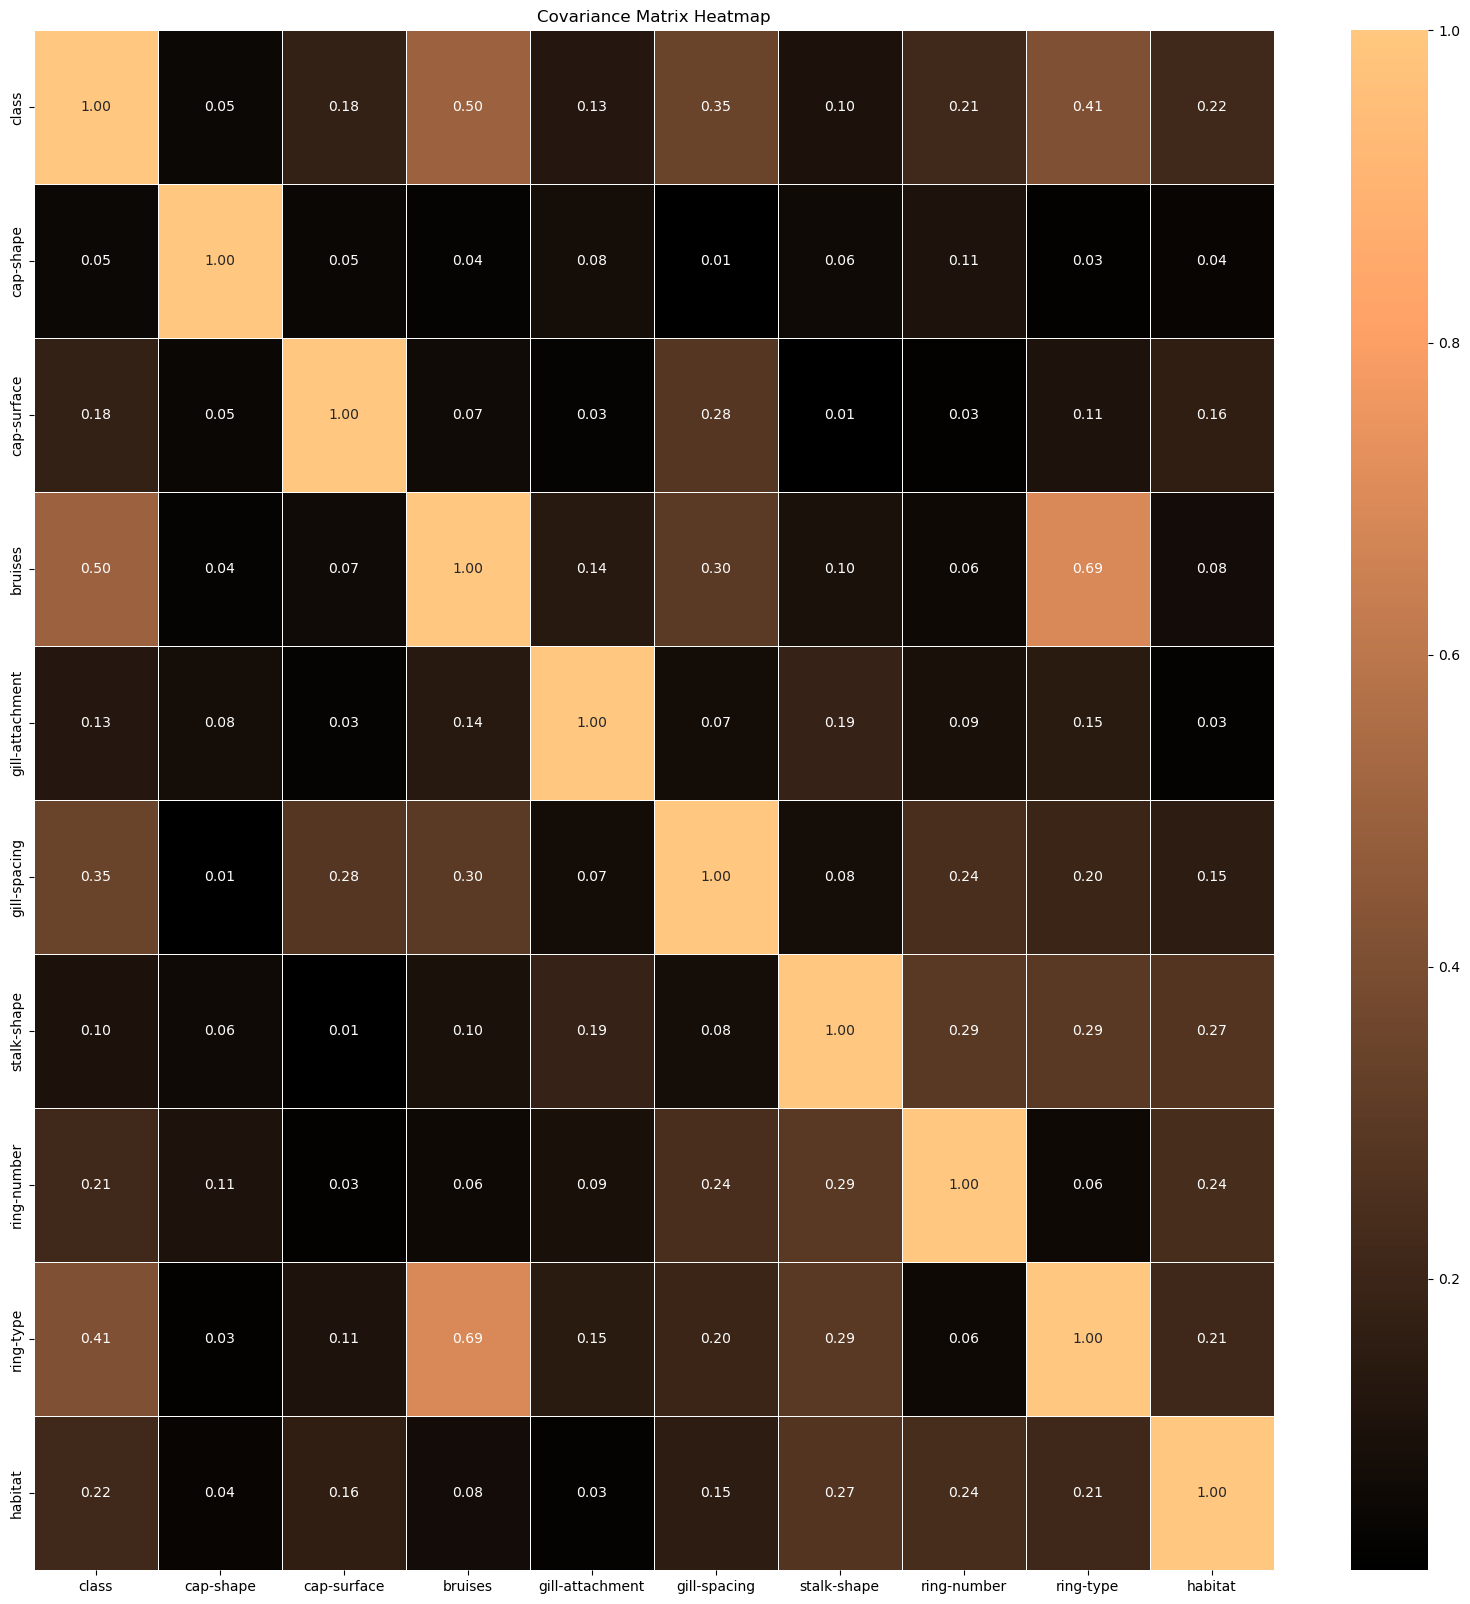

In [10]:
cov_matrix = abs(scaled_df.cov())
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, cmap='copper', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [11]:
#X = encoded_df.drop(['class', 'cap-color', 'cap-shape', 'stalk-color-below-ring','stalk-color-above-ring'], axis=1)
X = encoded_df.drop(['class'], axis=1)
Y = encoded_df[['class']]
X

,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,stalk-shape,ring-number,ring-type,habitat
0,5,2,1,1,0,0,1,4,5
1,5,2,1,1,0,0,1,4,1
2,0,2,1,1,0,0,1,4,3
3,5,3,1,1,0,0,1,4,5
4,5,2,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
8119,3,2,0,0,0,0,1,4,2
8120,5,2,0,0,0,0,1,4,2
8121,2,2,0,0,0,0,1,4,2
8122,3,3,0,1,0,1,1,0,2


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_train

,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,stalk-shape,ring-number,ring-type,habitat
0,-0.231089,0.136921,-0.842237,0.162899,-0.438473,0.869217,-0.258254,-1.261850,-0.877177
1,1.019408,0.136921,-0.842237,0.162899,-0.438473,0.869217,-0.258254,-1.261850,1.443749
2,-0.856337,0.951054,-0.842237,0.162899,-0.438473,0.869217,-0.258254,-1.261850,0.283286
3,-0.856337,-1.491346,1.187314,0.162899,-0.438473,0.869217,-0.258254,0.954123,-0.877177
4,-2.106834,0.951054,1.187314,0.162899,-0.438473,-1.150461,-0.258254,0.954123,0.863517
...,...,...,...,...,...,...,...,...,...
6494,1.019408,0.951054,-0.842237,0.162899,-0.438473,0.869217,-0.258254,-1.261850,1.443749
6495,-0.231089,0.951054,1.187314,0.162899,-0.438473,-1.150461,3.382510,-1.261850,2.604212
6496,-0.856337,0.951054,1.187314,0.162899,-0.438473,-1.150461,-0.258254,0.954123,1.443749
6497,-0.231089,0.136921,-0.842237,0.162899,-0.438473,0.869217,-0.258254,-1.261850,1.443749


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Custom scorer function
def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    return npv

# Create a custom scorer
npv_scorer = make_scorer(npv_score, greater_is_better=True)

dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [1,2,3,4,5],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=npv_scorer)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring=make_scorer(npv_score))

Best parameters: {'criterion': 'gini', 'max_depth': 5}
Best cross-validation score (NPV): 0.95
Accuracy of the Decision Tree model: 0.96


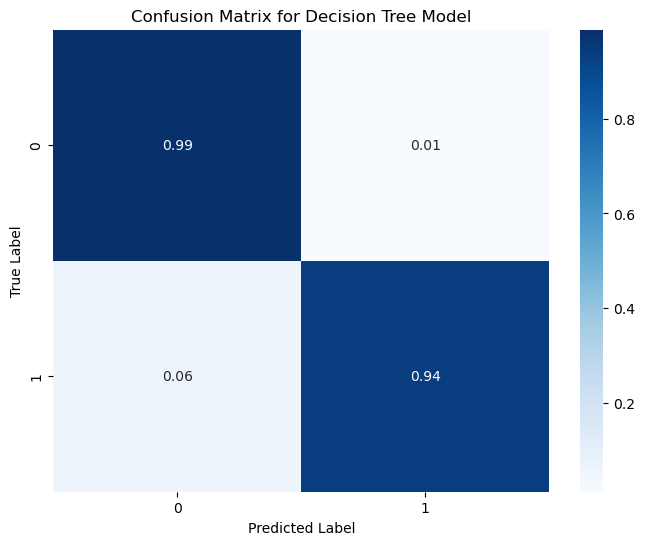

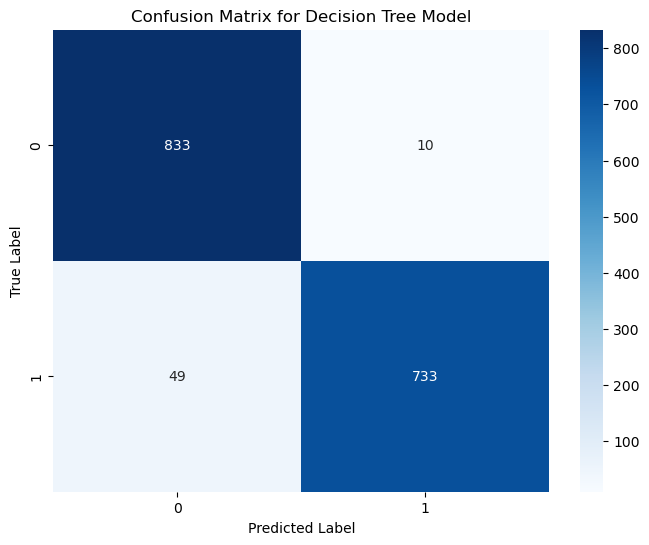

Negative Predicted Value 0.9444444444444444


In [15]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (NPV): {:.2f}".format(grid_search.best_score_))

dt_classifier = DecisionTreeClassifier(max_depth=5, criterion='gini')
dt_classifier.fit(X_train, y_train)
predictions = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

cm = confusion_matrix(y_test, predictions, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

print('Negative Predicted Value', 833/(49+833))

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
y_array_train = y_train['class']
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring=npv_scorer)

grid_search.fit(X_train, y_array_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150]},
             scoring=make_scorer(npv_score))

Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best cross-validation score (NPV): 0.95
Accuracy of the Random Forest model: 0.97


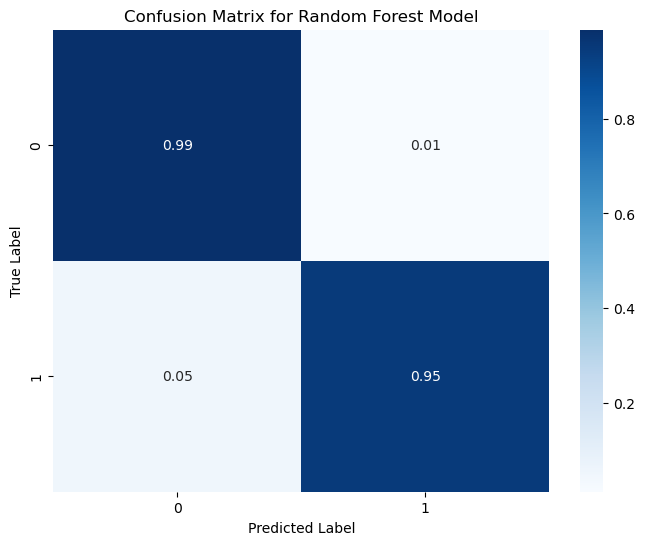

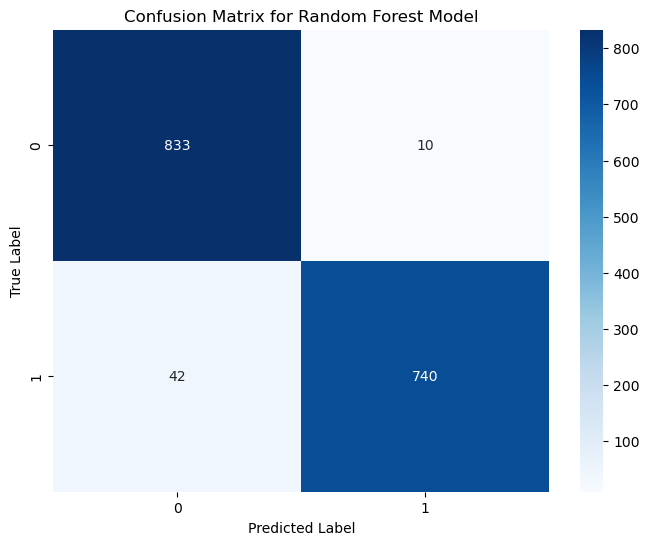

Negative Predicted Value: 0.9476678043230944


In [17]:

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (NPV): {:.2f}".format(grid_search.best_score_))
rf_classifier = RandomForestClassifier(max_depth= 5, n_estimators = 50)
rf_classifier.fit(X_train, y_array_train)
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

cm = confusion_matrix(y_test, predictions, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

print('Negative Predicted Value:', 833/(833+46))

In [18]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [1,2,3,4,5],
    'learning_rate': [0.01, 0.1, 0.2,0.5]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=10, scoring=npv_scorer)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

Best parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score (NPV): 0.98
Accuracy of the XGBoost Tree model: 0.41


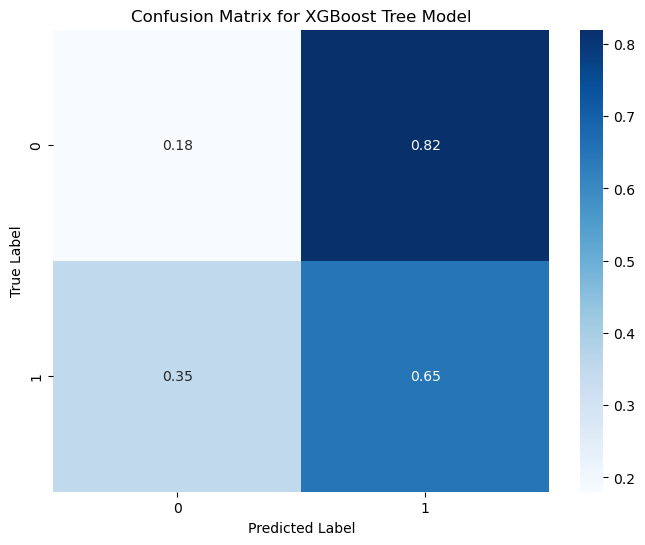

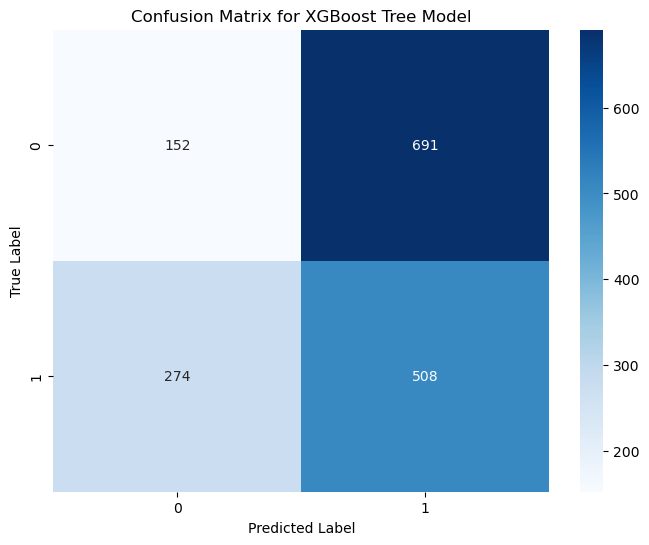

Negative Predicted Value: 0.3568075117370892


In [19]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (NPV): {:.2f}".format(grid_search.best_score_))

xgb_classifier = xgb.XGBClassifier(learning_rate = 0.5, max_depth=3, n_estimators = 100)
xgb_classifier.fit(X_train, y_array_train)
predictions = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the XGBoost Tree model: {accuracy:.2f}")

cm = confusion_matrix(y_test, predictions, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Tree Model')
plt.show()

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Tree Model')
plt.show()

print('Negative Predicted Value:', 152/(152+274))